Se importan las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests # Libreria para peticiones a la API 
import pandas as pd
import io


In [2]:

total_nacional = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/BANDA-ANCHA-Y-BANDA-ANGOS/data.csv/?auth_key=Nkm7IU29KfYuZNat3WQG2h6Tbtx5bBiwYKD9wOSn&applyFormat=1').content
df_total_nacional = pd.read_csv(io.StringIO(total_nacional.decode('latin-1')), encoding='latin1')
accesos_tecnologia = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.csv/?auth_key=Nkm7IU29KfYuZNat3WQG2h6Tbtx5bBiwYKD9wOSn&applyFormat=1').content
df_accesos_tecnologia = pd.read_csv(io.StringIO(total_nacional.decode('latin-1')), encoding='latin1')

df_total_nacional = df_total_nacional.drop(columns=['Dial up', 'Total']) # se remueven las columnas ya que no son de interes
df_total_nacional['Banda ancha fija'] = df_total_nacional['Banda ancha fija'].astype(str).str.replace('.', '') # Se eliminan los puntos en los millones y miles
df_total_nacional

<ipython-input-2-c4e8d9746eef>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_total_nacional['Banda ancha fija'] = df_total_nacional['Banda ancha fija'].astype(str).str.replace('.', '') # Se eliminan los puntos en los millones y miles


,AÃ±o,Trimestre,Provincia,Banda ancha fija
0,2022,2,Buenos Aires,4660984
1,2022,2,Capital Federal,1534626
2,2022,2,Catamarca,67007
3,2022,2,Chaco,143559
4,2022,2,Chubut,161901
...,...,...,...,...
811,2014,1,Santa Cruz,26304
812,2014,1,Santa Fe,506000
813,2014,1,Santiago Del Estero,37124
814,2014,1,Tierra Del Fuego,27272


In [3]:
df_total_nacional.rename(columns = {'AÃ±o':'Anio'}, inplace = True)
df_total_nacional['Banda ancha fija'] =df_total_nacional['Banda ancha fija'].astype(float)
df_total_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Anio              816 non-null    int64  
 1   Trimestre         816 non-null    int64  
 2   Provincia         816 non-null    object 
 3   Banda ancha fija  816 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.6+ KB


Identificación de porcentaje de valores nulos

In [4]:
missing_values_count = df_total_nacional.isnull().sum()
total_cells = np.product(df_total_nacional.shape)
total_missing_values = missing_values_count.sum()
missing_values_rate = total_missing_values / total_cells * 100
print(missing_values_rate)

0.0


In [5]:
df_total_nacional = df_total_nacional.dropna() # se eliminan valores nulos

In [6]:
df_total_nacional.nunique()

Anio                  9
Trimestre             4
Provincia            24
Banda ancha fija    809
dtype: int64

¿Cuáles son las provincias con mayor acceso a internet de Argentina?

<Figure size 144x144 with 0 Axes>

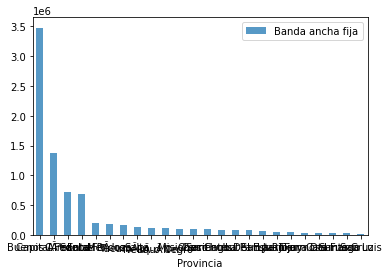

In [11]:
df_banda_ancha_provincia = df_total_nacional[['Anio', 'Banda ancha fija', 'Provincia']]
df_banda_ancha_provincia = df_banda_ancha_provincia.groupby(['Provincia'])[['Banda ancha fija']].median()
df_banda_ancha_provincia = df_banda_ancha_provincia.sort_values('Banda ancha fija', ascending=False)

plt.figure(figsize=(2, 2))
display(df_banda_ancha_provincia.plot.bar(y="Banda ancha fija", use_index=True, alpha=0.75, rot=0))

In [8]:
from urllib.requuest import urlopen
import json

ModuleNotFoundError: ignored